# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: Abimael Bautista Oliveros
## NÚMERO DE CONTROL: 20120084

## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv('reviews.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABIMAEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABIMAEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABIMAEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ABIMAEL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   878 non-null    object 
 1   Review  878 non-null    object 
 2   Date    878 non-null    object 
 3   Rating  870 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.6+ KB


None

In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Rating,870.0,8.517241,2.268826,1.0,8.0,9.0,10.0,10.0


In [8]:
null_counts = df.isnull().sum()
print(null_counts)
#solo hay 8 nulos en Rating

Title     0
Review    0
Date      0
Rating    8
dtype: int64


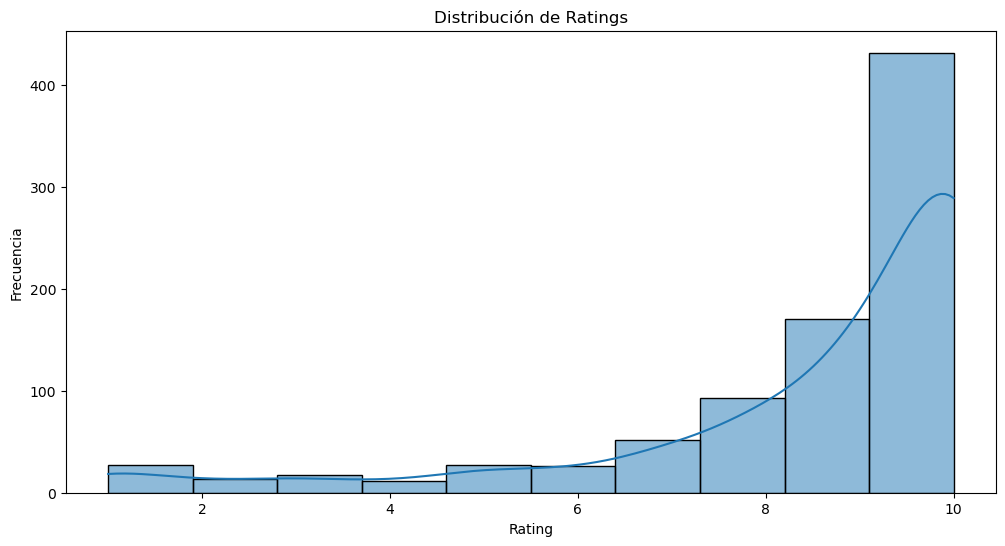

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'].dropna(), bins=10, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
#En Rating los vaolres que mas hay son de 10 haciendo que sea seguido por 8 y 9.

In [11]:
#5.
#las columnas "Title" y "Review" probablemente contienen diferentes títulos y reseñas, que podrían ser considerados como categorías o etiquetas. 

## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").



In [27]:
subset = df[['Rating', 'Review']].head(10)
print(subset)

   Rating                                             Review
0     8.0  I have to admit that I've never watched any of...
1     9.0  I'm a 60yo man & old school like the The Marin...
2     9.0  Every live action anime that I've briefly seen...
3    10.0  This is bar none one of the best live-action a...
4    10.0  Being a one piece fan myself, I was a bit inse...
5    10.0  GREAT ADAPTATION! As an old-school fan (since ...
6     9.0  My kids play and watch One Piece anime and lov...
7    10.0  I was so surprised that Netflix made something...
8     8.0  Parenthetically I don't know anything about th...
9    10.0  Initially I was apprehensive because of anime ...


In [28]:
##Este análisis preliminar sugiere que las primeras reseñas son en su mayoría positivas, con algunos revisores expresando una reserva inicial que parece disiparse una vez que ven la adaptación.

In [29]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()  
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [30]:
df['ReviewText'] = df['Review'].apply(preprocess_text)
df['TitleText'] = df['Title'].apply(preprocess_text)

In [32]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

In [33]:
df['ReviewSentiment'] = df['ReviewText'].apply(get_sentiment)
df['TitleSentiment'] = df['TitleText'].apply(get_sentiment)

In [34]:
df[['ReviewSentiment', 'TitleSentiment']].head(10)

,ReviewSentiment,TitleSentiment
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

### Paso 7. Escriba sus conclusiones al respecto.

In [35]:
df_clean = df.dropna()
X = df_clean[['ReviewSentiment', 'TitleSentiment']]
y = df_clean['Rating']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [37]:
# Entrenamiento de modelos

In [43]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
precision_knn = accuracy_score(y_test, knn_predictions)
print(f"Precisión del modelo KNN: {precision_knn}")

Precisión del modelo KNN: 0.4961832061068702


In [44]:
#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
precision_svm = accuracy_score(y_test, svm_predictions)
print(f"Precisión del modelo SVM: {precision_svm}")

Precisión del modelo SVM: 0.4961832061068702


In [45]:
#RandomForest
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
precision_rf = accuracy_score(y_test, rf_predictions)
print(f"Precisión del modelo RandomForest: {precision_rf}")

Precisión del modelo RandomForest: 0.4961832061068702


In [46]:
#Por alguna razon los 3 modelos devuelven el mismo valor

In [48]:
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE KNN: {rmse_knn}")
print(f"RMSE SVM: {rmse_svm}")
print(f"RMSE RandomForest: {rmse_rf}")

RMSE KNN: 2.6787259133931505
RMSE SVM: 2.6787259133931505
RMSE RandomForest: 2.6787259133931505


In [51]:
X_prediction = df[df['Rating'].isnull()][['ReviewSentiment', 'TitleSentiment']]
knn_predictions_null = knn_model.predict(X_prediction)

df_predictions_knn = pd.DataFrame({
    'Rating_Predicted_KNN': knn_predictions_null,
    'Review': df[df['Rating'].isnull()]['Review'],
    'Title': df[df['Rating'].isnull()]['Title'],    
})
df_predictions_knn[['Review', 'Rating_Predicted_KNN']].head(10).T

,143,145,447,500,520,540,569,782
Review,"I admit, when I write reviews it's usually whe...","Fun fact: Eiichiro Oda, the creator of the man...",Just because there are many scenes in the mang...,I like the characters so far except Sanji's ha...,One Piece somehow managed to pull it off: a le...,As a life long fan of One Piece I don't know w...,If you browse there are series with more actio...,Everything went so right with casting and thei...
Rating_Predicted_KNN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [70]:
#Si la reseña parece ser altamente positiva y llena de elogios, el resultado de KNN 10.0 puesto que los resultados son los mismos.

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.